In [ ]:
# Python
!pip install nfl_data_py
#import pandas as pd
#import nfl_data_py as nfl
#pbp_py = nfl.iport_pbp_data([2021])


In [ ]:
import pandas as pd
import nfl_data_py as nfl

In [ ]:
pbp_py = nfl.import_pbp_data([2021])

2021 done.
Downcasting floats.


In [ ]:
# Write the DataFrame to a CSV file
pbp_py.to_csv('Original NFL File', index=True)

In [ ]:
pbp_py.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_players', 'defense_players', 'n_offense', 'n_defense',
       'ngs_air_yards', 'time_to_throw', 'was_pressure', 'route',
       'defense_man_zone_type', 'defense_coverage_type'],
      dtype='object', length=390)

In [ ]:
pbp_py.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,None,None,None,None
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0032560;00-0036356;00-0035705;00-0036896;00...,00-0032496;00-0036652;00-0032355;00-0033455;00...,11.0,11.0,NaN,NaN,None,None,None,None
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0,NaN,NaN,None,None,None,None
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0,2.13,2.536,False,ANGLE,ZONE_COVERAGE,COVER_6
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0032355;00-0029413;00-0029701;00-0033455;00...,00-0036356;00-0032127;00-0035705;00-0030528;00...,11.0,11.0,9.82,2.703,False,HITCH,ZONE_COVERAGE,COVER_6
5,122.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,00-0032496;00-0036652;00-0034389;00-0035099;00...,00-0032560;00-0036936;00-0030155;00-0036896;00...,11.0,11.0,NaN,NaN,None,None,None,None
6,152.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,00-0036363;00-0030564;00-0036936;00-0030155;00...,00-0036237;00-0033954;00-0029681;00-0034743;00...,11.0,11.0,26.98,3.303,False,GO,ZONE_COVERAGE,COVER_3
7,181.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,00-0036363;00-0030564;00-0036936;00-0030155;00...,00-0036237;00-0033954;00-0029681;00-0034743;00...,11.0,11.0,NaN,NaN,None,None,None,None
8,218.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,00-0036363;00-0030564;00-0030155;00-0035228;00...,00-0036237;00-0033954;00-0029681;00-0034743;00...,11.0,11.0,-3.36,4.238,False,FLAT,ZONE_COVERAGE,COVER_3
9,253.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,00-0036363;00-0034775;00-0030564;00-0035228;00...,00-0033954;00-0029681;00-0034743;00-0036181;00...,11.0,11.0,19.24,2.536,False,GO,ZONE_COVERAGE,COVER_4


In [ ]:
filter_crit = 'play_type == "pass" & air_yards.notnull()'

In [ ]:
pbp_py_p = (
    pbp_py.query(filter_crit)
    .groupby(["passer_id", "passer"])
    .agg({"air_yards": ["count", "mean"]})
)

In [ ]:
pbp_py_p

air_yards           
                                count       mean
passer_id  passer                               
00-0019596 T.Brady                808   7.941832
00-0022924 B.Roethlisberger       647   6.761978
00-0023459 A.Rodgers              556   7.730216
00-0023682 R.Fitzpatrick            6   1.500000
00-0024417 S.Koch                   1  10.000000
...                               ...        ...
00-0036946 K.Mond                   3   0.000000
00-0036971 T.Lawrence             598   7.913043
00-0036972 M.Jones                557   7.901257
00-0037012 T.Lance                 71   9.267606
00-0037013 Z.Wilson               382   7.565445

[119 rows x 2 columns]

In [ ]:
pbp_py_p.columns = list(map("_".join, pbp_py_p.columns.values))
sort_crit = "air_yards_count > 100"
print(
    pbp_py_p.query(sort_crit)\
    .sort_values(by = "air_yards_mean", ascending=[False])\
                 .to_string()
)

                             air_yards_count  air_yards_mean
passer_id  passer                                           
00-0035704 D.Lock                        110       10.154546
00-0029263 R.Wilson                      400        9.887500
00-0036945 J.Fields                      268        9.835821
00-0034796 L.Jackson                     378        9.341269
00-0036389 J.Hurts                       473        9.190275
00-0034855 B.Mayfield                    416        8.776443
00-0026498 M.Stafford                    740        8.508108
00-0031503 J.Winston                     161        8.322982
00-0029604 K.Cousins                     556        8.228417
00-0034857 J.Allen                       708        8.224576
00-0031280 D.Carr                        676        8.128698
00-0031237 T.Bridgewater                 426        8.037559
00-0019596 T.Brady                       808        7.941832
00-0035228 K.Murray                      515        7.941748
00-0036971 T.Lawrence   

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(pbp_py_p.index)


MultiIndex([('00-0019596',          'T.Brady'),
            ('00-0022924', 'B.Roethlisberger'),
            ('00-0023459',        'A.Rodgers'),
            ('00-0023682',    'R.Fitzpatrick'),
            ('00-0024417',           'S.Koch'),
            ('00-0026035',       'D.Amendola'),
            ('00-0026143',           'M.Ryan'),
            ('00-0026158',         'J.Flacco'),
            ('00-0026197',          'C.Henne'),
            ('00-0026300',        'J.Johnson'),
            ...
            ('00-0036825',         'F.Franks'),
            ('00-0036898',          'D.Mills'),
            ('00-0036913',          'K.Toney'),
            ('00-0036929',           'I.Book'),
            ('00-0036945',         'J.Fields'),
            ('00-0036946',           'K.Mond'),
            ('00-0036971',       'T.Lawrence'),
            ('00-0036972',          'M.Jones'),
            ('00-0037012',          'T.Lance'),
            ('00-0037013',         'Z.Wilson')],
           names=['pass

In [ ]:
passer_names = pbp_py_p.index.get_level_values('passer')
print(passer_names)

Index(['T.Brady', 'B.Roethlisberger', 'A.Rodgers', 'R.Fitzpatrick', 'S.Koch',
       'D.Amendola', 'M.Ryan', 'J.Flacco', 'C.Henne', 'J.Johnson',
       ...
       'F.Franks', 'D.Mills', 'K.Toney', 'I.Book', 'J.Fields', 'K.Mond',
       'T.Lawrence', 'M.Jones', 'T.Lance', 'Z.Wilson'],
      dtype='object', name='passer', length=119)


In [ ]:
print(pbp_py_p.columns)


Index(['air_yards_count', 'air_yards_mean'], dtype='object')


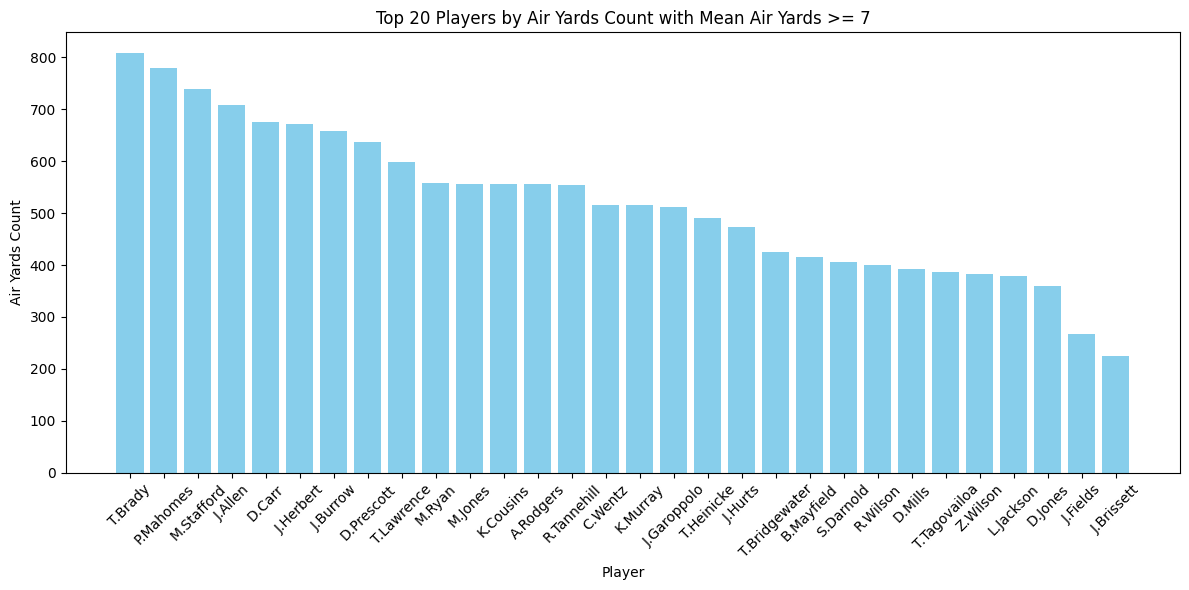

In [ ]:
# Filter the DataFrame for passers with air_yards_mean of 7.0 or higher
filtered_df = pbp_py_p[pbp_py_p['air_yards_mean'] >= 7.0]

# Sort the filtered DataFrame by 'air_yards_count' in descending order
sorted_df = filtered_df.sort_values(by='air_yards_count', ascending=False)

# Now, select the top 20 players from the sorted DataFrame
top_20 = sorted_df.head(30)

# Extract 'passer' names from the MultiIndex for use as x-axis labels
x_labels = top_20.index.get_level_values('passer')

# Extract the 'air_yards_count' for use as y-axis values
y_values = top_20['air_yards_count']

# Create the bar chart for the top 20
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
plt.bar(x_labels, y_values, color='skyblue')  # You can choose a color

# Adding titles and labels
plt.title('Top 20 Players by Air Yards Count with Mean Air Yards >= 7')
plt.xlabel('Player')
plt.ylabel('Air Yards Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)  # Rotate to 45 degrees for better label visibility

# Display the chart
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


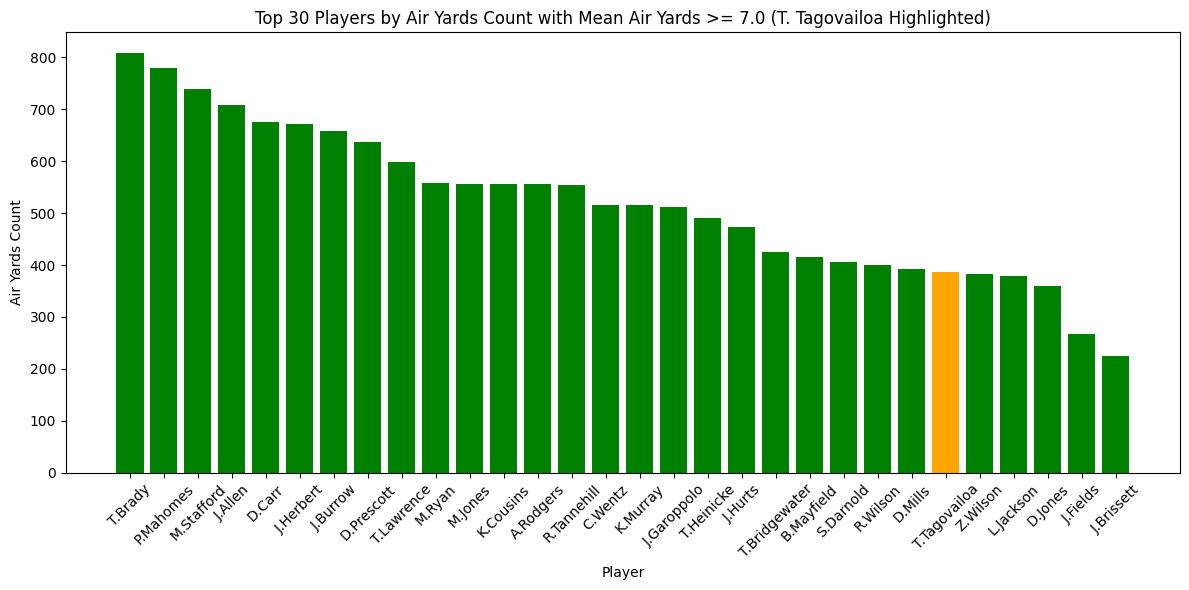

In [ ]:
# Filter, sort, and select the top 30 as before
filtered_df = pbp_py_p[pbp_py_p['air_yards_mean'] >= 7.0]
sorted_df = filtered_df.sort_values(by='air_yards_count', ascending=False)
top_30 = sorted_df.head(30)

# Extract 'passer' names from the MultiIndex for use as x-axis labels
x_labels = top_30.index.get_level_values('passer')

# Extract the 'air_yards_count' for use as y-axis values
y_values = top_30['air_yards_count']

# Create the bar chart for the top 30
plt.figure(figsize=(12, 6))

# Loop through the x_labels and y_values and plot each bar individually
for i, (label, value) in enumerate(zip(x_labels, y_values)):
    if label == 'T.Tagovailoa':  # Check if the current label is the player to highlight
        plt.bar(label, value, color='orange')  # Highlight in red
    else:
        plt.bar(label, value, color='green')  # Use a default color for other bars

# Adding titles and labels
plt.title('Top 30 Players by Air Yards Count with Mean Air Yards >= 7.0 (T. Tagovailoa Highlighted)')
plt.xlabel('Player')
plt.ylabel('Air Yards Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
# Write the DataFrame to a CSV file
sorted_df.to_csv('NFL Passer Data.csv', index=True)